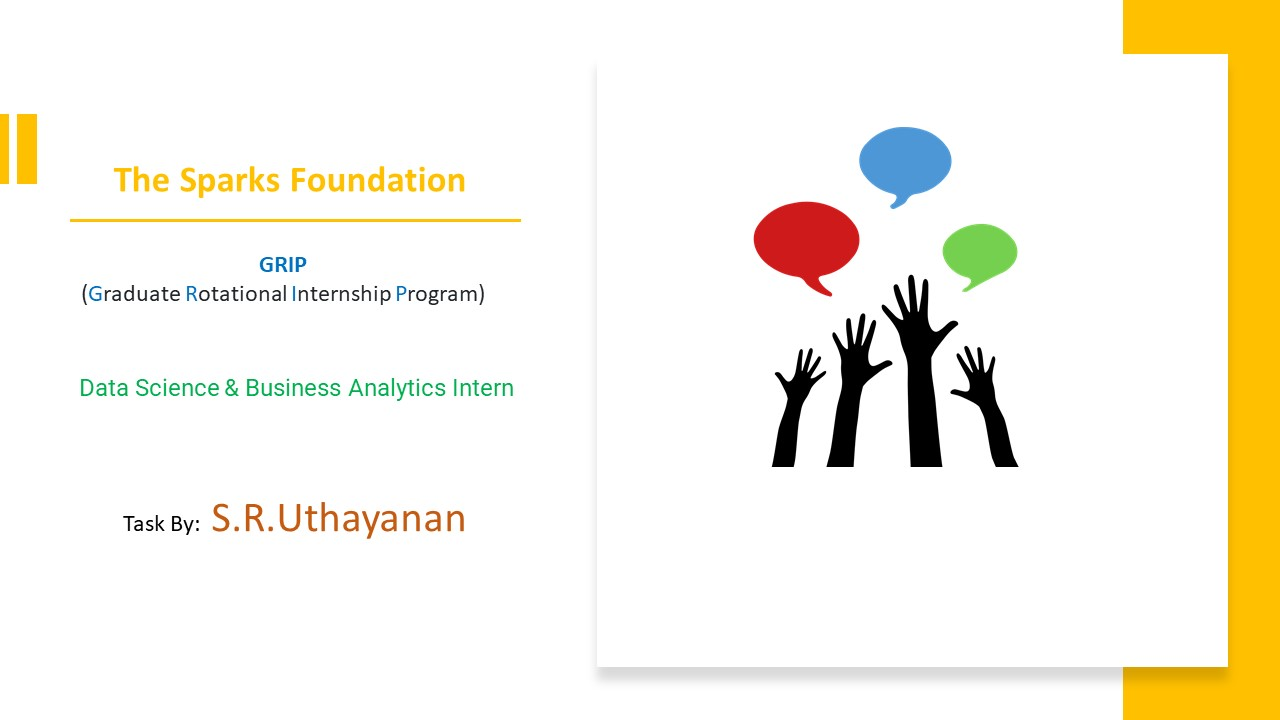

# Task-3: Exploratory Data Analysis on Sample Super store

## Problem Statement

- Find out the weak areas where you can work to make more profit.
- What all business problems we can derive by exploring the  data?


## Data Description


|Variables	    |Description
|:-----------   |:-------------------------------- |
|Ship Mode:     |Mode through which items are shipped|
|Segment:       |what type of segment he/she belongs to|
|Country:       |Country Name to where the items are shipped|
|City:          |City Name to where the items are shipped|
|State:         |State Name to where the items are shipped|
|Postal Code:   |Postal Code to where the items are shipped|
|Region:        |Region to where the items are shipped|
|Category:      |What type of items are shipped|
|Sub-Category:  |what sub-type of items are shipped|
|Sales:         |How much is the sales for the items|
|Quantity:      |How much quantity are being sold|
|Discount:      |What is the discount offered|
|Profit:        |What is the profit gained|

## Import Libraries

In [1]:
import numpy as np                     
import pandas as pd

pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', -1)           
pd.options.display.max_columns = 50  
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:5f}'.format)

import warnings
warnings.filterwarnings('ignore')                  

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)   

<ipython-input-1-a3d3e0bdf400>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Import dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sruthayanan/TSF-GRIP/main/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960000,2,0.000000,41.913600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940000,3,0.000000,219.582000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620000,2,0.000000,6.871400
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.577500,5,0.450000,-383.031000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368000,2,0.200000,2.516400


## Data Examination

### Observations of Data

In [3]:
data.shape

(9994, 13)

- Total observations are 9994 and 13 Variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.isnull().sum().sort_values(ascending = False)

Profit          0
Discount        0
Quantity        0
Sales           0
Sub-Category    0
Category        0
Region          0
Postal Code     0
State           0
City            0
Country         0
Segment         0
Ship Mode       0
dtype: int64

- No Missing Values

In [6]:
data.duplicated().sum()

17

- 17 duplicated rows in the dataset

In [7]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,nan,4,3,17,nan,nan,nan,nan
top,Standard Class,Consumer,United States,New York City,California,nan,West,Office Supplies,Binders,nan,nan,nan,nan
freq,5968,5191,9994,915,2001,nan,3203,6026,1523,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [8]:
data.nunique()

Ship Mode       4   
Segment         3   
Country         1   
City            531 
State           49  
Postal Code     631 
Region          4   
Category        3   
Sub-Category    17  
Sales           5825
Quantity        14  
Discount        12  
Profit          7287
dtype: int64

### Pre-processing of Data

#### Removing Duplicates

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(9977, 13)

- dataset has a size of 9977 after dropping duplicates

In [25]:
data = data.round(3)

In [11]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Exploratory Data Analysis

### Univariate Analysis

Standard Class    5955
Second Class      1943
First Class       1537
Same Day          542 
Name: Ship Mode, dtype: int64


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

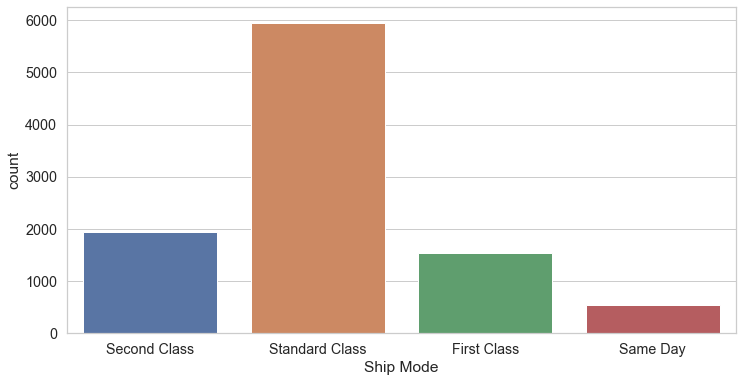

In [12]:
print(data['Ship Mode'].value_counts())
plt.figure(figsize = [12, 6])
sns.countplot(x='Ship Mode',data=data)

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


<AxesSubplot:xlabel='Segment', ylabel='count'>

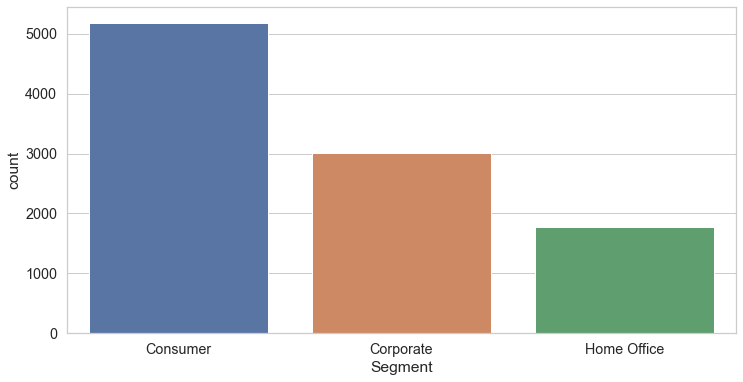

In [13]:
print(data['Segment'].value_counts())
plt.figure(figsize = [12, 6])
sns.countplot(x='Segment',data=data)

<AxesSubplot:xlabel='State', ylabel='count'>

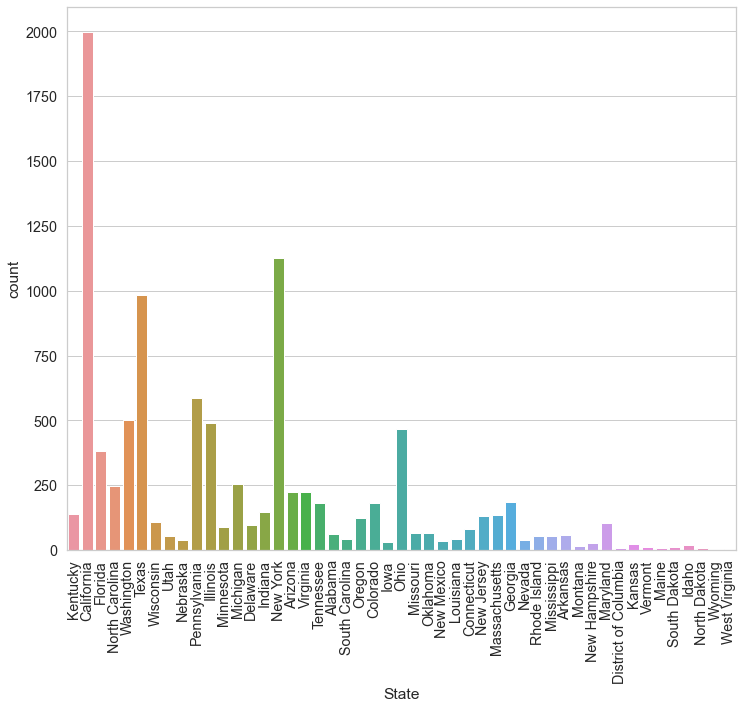

In [14]:
plt.figure(figsize = [12, 10])
plt.xticks(rotation=90)
sns.countplot(x='State',data=data)

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


<AxesSubplot:xlabel='Region', ylabel='count'>

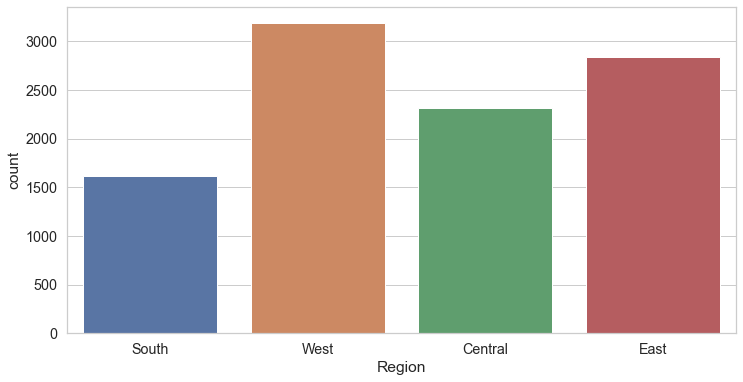

In [15]:
print(data['Region'].value_counts())
plt.figure(figsize = [12, 6])
sns.countplot(x='Region',data=data)

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

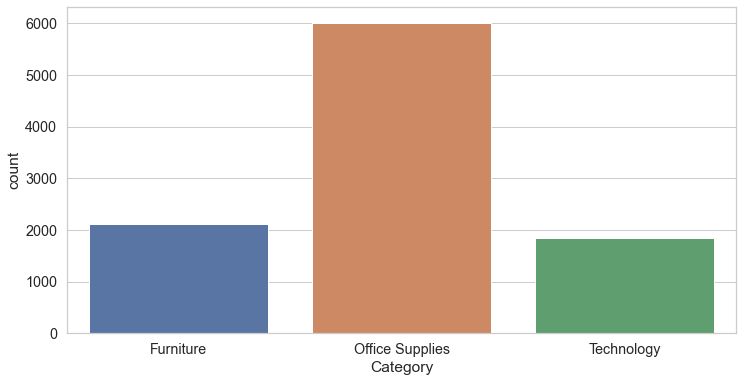

In [16]:
print(data['Category'].value_counts())
plt.figure(figsize = [12, 6])
sns.countplot(x='Category',data=data)

Binders        1522
Paper          1359
Furnishings    956 
Phones         889 
Storage        846 
Art            795 
Accessories    775 
Chairs         615 
Appliances     466 
Labels         363 
Tables         319 
Envelopes      254 
Bookcases      228 
Fasteners      217 
Supplies       190 
Machines       115 
Copiers        68  
Name: Sub-Category, dtype: int64


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

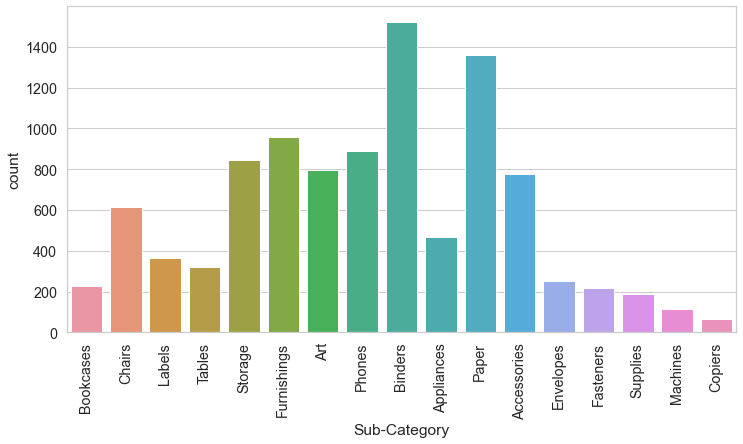

In [17]:
print(data['Sub-Category'].value_counts())
plt.figure(figsize = [12, 6])
plt.xticks(rotation=90)
sns.countplot(x='Sub-Category',data=data)

<AxesSubplot:xlabel='Sales'>

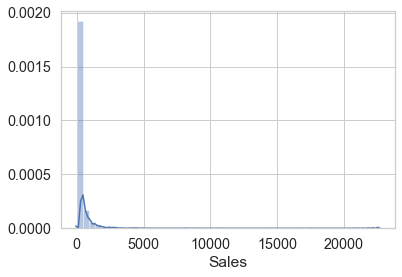

In [18]:
sns.distplot(data.Sales)

<AxesSubplot:xlabel='Quantity'>

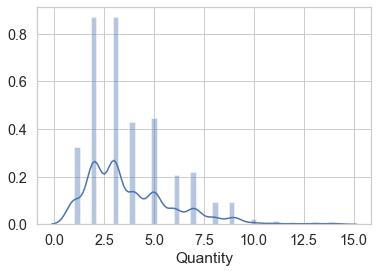

In [19]:
sns.distplot(data.Quantity)

<AxesSubplot:xlabel='Discount'>

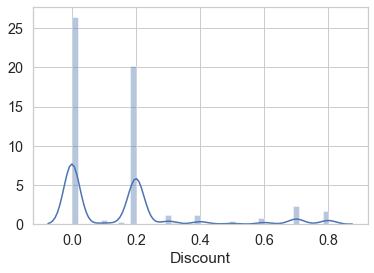

In [20]:
sns.distplot(data.Discount)

<AxesSubplot:xlabel='Profit'>

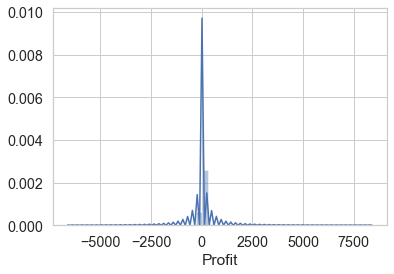

In [21]:
sns.distplot(data.Profit)

### Category wise Sales & Profit Analysis

In [40]:
df_category = data.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()

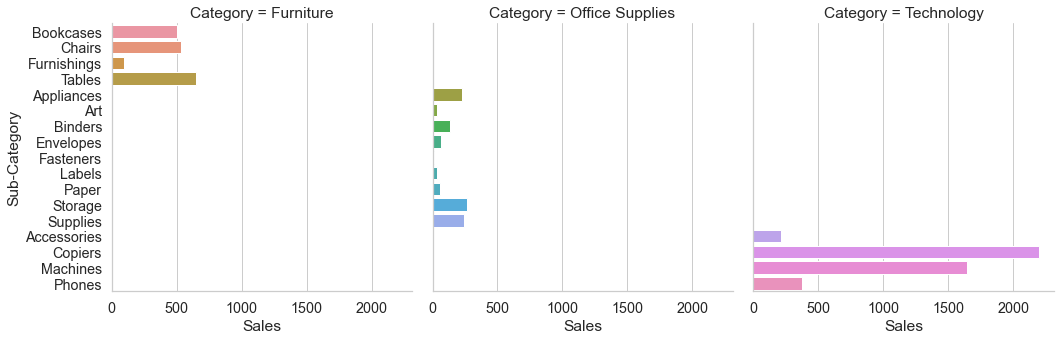

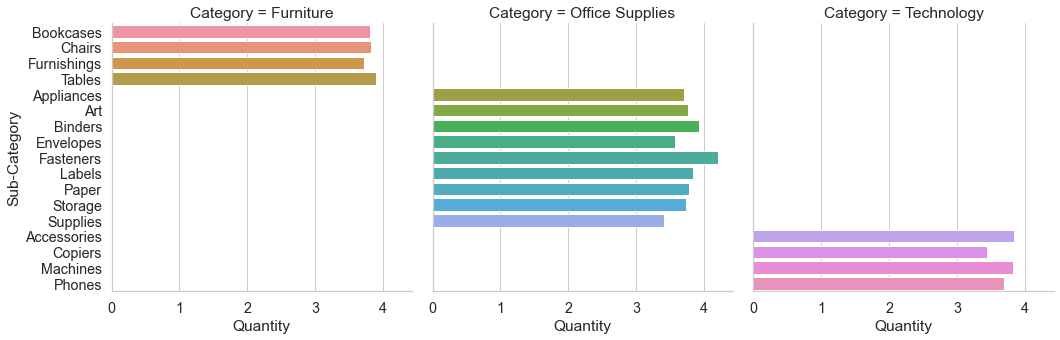

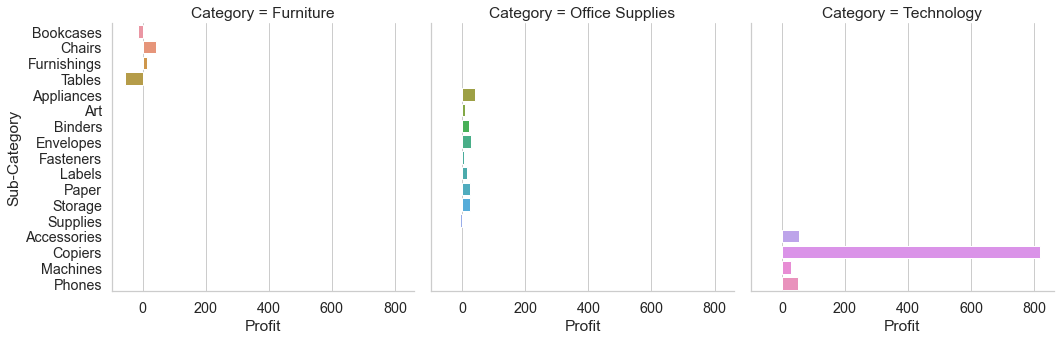

In [41]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=df_category,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=df_category,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=df_category,
                kind='bar')


- Sales are more in technology category than other two category.
- Copiers and Machines are sold the most in technology category.
- Quantity of products are almost sold in equal amount in each category.
- The furniture category incurs more losses than losses in the technology and Office Supplies category. Bookcases and Tables are incurring a loss.
- In Office Supplies category, there is a very minimal profit in all sub-categories.
- In technology category, Copiers provide the most profit among all others.

### Segment wise Sales & Profit Analysis

In [44]:
df_segment = data.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()

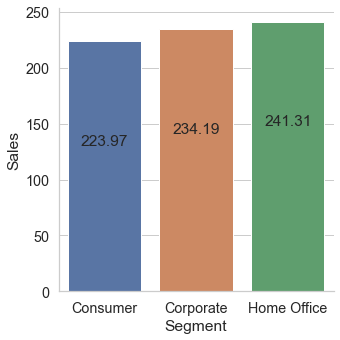

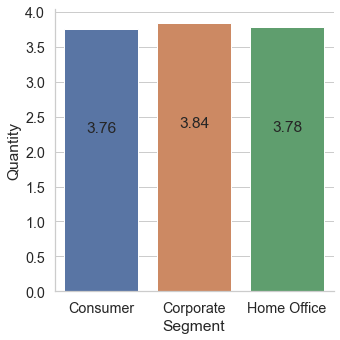

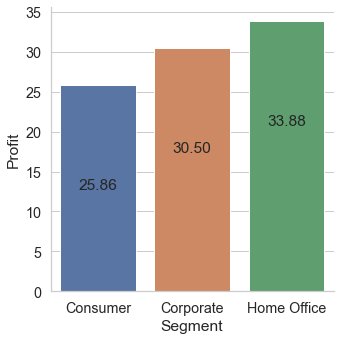

In [51]:
x = sns.catplot(x="Segment", y="Sales", data=df_segment, kind='bar')
for ax in x.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
           
y = sns.catplot(x="Segment", y="Quantity", data=df_segment, kind='bar')
for ax in y.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')

z = sns.catplot(x="Segment", y="Profit", data=df_segment, kind='bar')
for ax in z.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')

- sales and quantity sold are same accross all 3 segments
- Profit gained in the Home Office segment is higher comparing other two segments

### Region wise Sales & Profit Analysis

In [42]:
df_region = data.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()

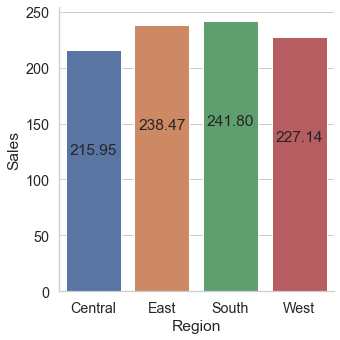

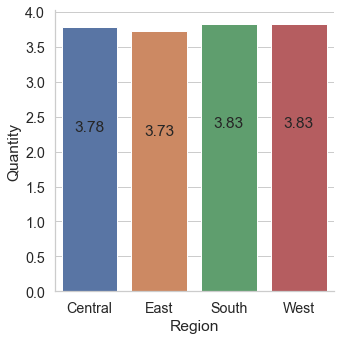

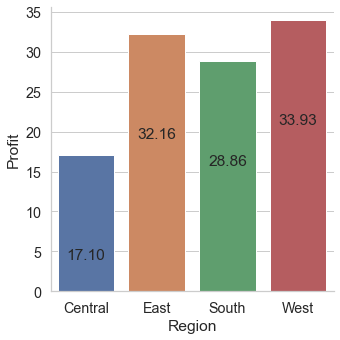

In [50]:
x = sns.catplot(x="Region", y="Sales", data=df_region, kind='bar')
for ax in x.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
           
y = sns.catplot(x="Region", y="Quantity", data=df_region, kind='bar')
for ax in y.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')

z = sns.catplot(x="Region", y="Profit", data=df_region, kind='bar')
for ax in z.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')

- Sales are more in Southern and Eastern part of United States.
- Quantity of products sold across all the regions are almost same.
- Profit gained in Western part is higher followed by Eastern part, Southern part then Central part of United States.

### State wise Sales & Profit Analysis

In [52]:
df_state = data.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()

#### Top 10 State with Highest Sales

In [53]:
sales10 = df_state.sort_values(['Sales'],ascending=False)[:10]
sales_values = sales10.Sales
sales_labels = sales10.State

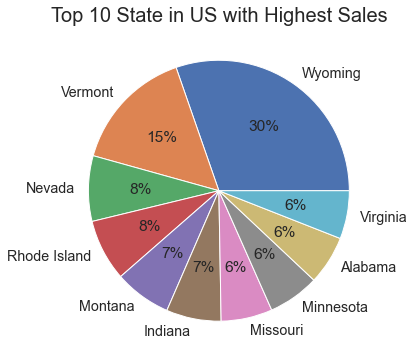

In [55]:
plt.figure(figsize = [12, 6])
plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

#### Top 10 State with Highest Quantity Sold

In [60]:
qty10 = df_state.sort_values(['Quantity'],ascending=False)[:10]
qty_values = qty10.Quantity
qty_labels = qty10.State

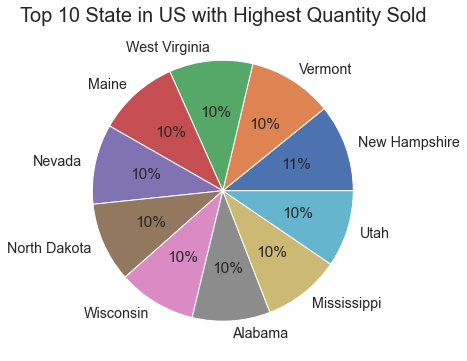

In [61]:
plt.figure(figsize = [12, 6])
plt.pie(qty_values, labels=qty_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

#### Top 10 State with Highest Profit Gained

In [62]:
profit10 = df_state.sort_values(['Profit'],ascending=False)[:10]
profit_values = profit10.Profit
profit_labels = profit10.State

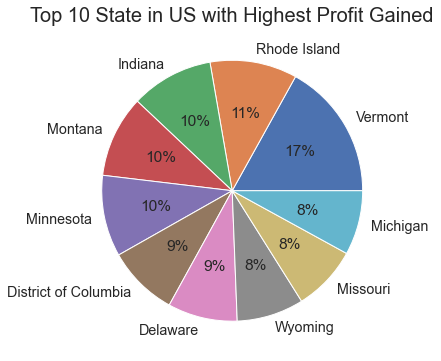

In [63]:
plt.figure(figsize = [12, 6])
plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

- Wyoming sales are highest among all but with a profit of only 8%.
- Almost all top 10 states have same quantity sold
- Vermont State gained the highest profit among all but with a sales of only 15%.

### Ship Mode wise Sales & Profit Analysis

In [69]:
df_shipmode = data.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

In [70]:
df_shipmode

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.614489,3.702017,31.850136
1,Same Day,236.755950,3.608856,29.283921
2,Second Class,236.323749,3.817808,29.565951
3,Standard Class,227.928858,3.821327,27.534715


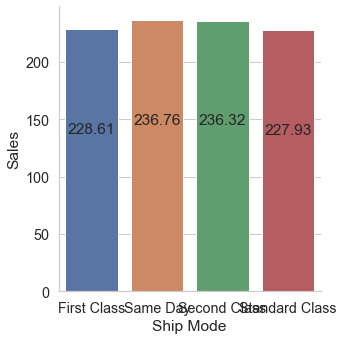

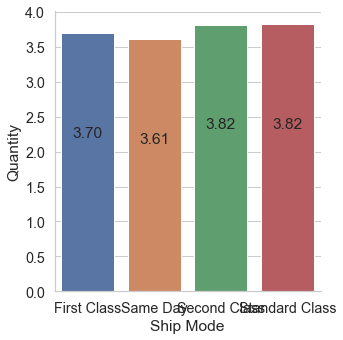

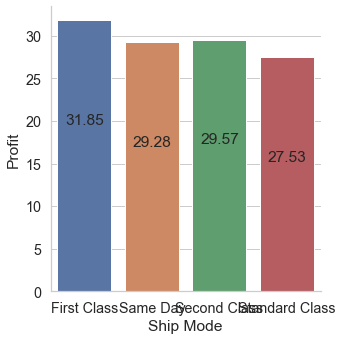

In [79]:
x = sns.catplot(x='Ship Mode', y="Sales", data=df_shipmode, kind='bar')
for ax in x.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
        
y = sns.catplot(x='Ship Mode', y="Quantity", data=df_shipmode, kind='bar')
for ax in y.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
        
z = sns.catplot(x='Ship Mode', y="Profit", data=df_shipmode, kind='bar')
for ax in z.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')

- ship mode doesn't affect the Profit, Sales and Quantity. All types of Ship Mode show the almost same values.

## Conclution

- Technology Category are in demand. So if production in this field will be more, then company can get more profit.
- Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.
- People in the South and East prefer most of the goods. Company must spread out their products in these part of US.
- Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.
- Wyoming State have highest sales and Vermont State have the highest Profit. Company must place all types of products in these states for more profit and sales.

## Actionable Insights

- More discounts can trigger sales/profits. 

- Discounts should be based on the Sales and should not increase a particular range otherwise unnecessary disounts with low sales can witness huge losses.

- Binders and Machines industry should be focused upon more so as to strengthen these weakened industry areas. 

- Office Supplies and the Furniture industries do not seem to boom in the Central Region.

- we can assign more and more creative ideas in the growing sector to help the company grow and earn profits more and more.